<a href="https://colab.research.google.com/github/tianchu-shu/DistinctiveSchools/blob/master/Predicting_SpringCGP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import datetime as dt  


from google.colab import drive

In [4]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import glob, os

data_dir= '/content/gdrive/My Drive/Prediction/'
os.chdir(data_dir)

In [4]:
#Import my own code
import pipeline as pp
from final import *

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.nearest_centroid module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# Bigquery

In [6]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [0]:
#Getting the data for predicting spring CGP

%%bigquery --project ds-student-data df

SELECT *
FROM `ds-student-data.NweaAnalysis.RegressionforStoSGrowth`

(79865, 11)

In [8]:
df.shape

(80099, 11)

# Clean the data

In [9]:
df.head()

,TermName,StudentID,SchoolName,Grade,Discipline,TestPercentile,FalltoWinterConditionalGrowthIndex,WintertoWinterConditionalGrowthIndex,PercentCorrect,SpringtoSpringConditionalGrowthPercentile,TestRITScore
0,Winter 2019-2020,1113447494,Plymouth Educational Center,7,Mathematics,4,-2.75,NaN,50,NaN,197
1,Winter 2019-2020,1131079605,Plymouth Educational Center,6,Mathematics,1,0.79,NaN,43,NaN,167
2,Winter 2019-2020,1316769769,Plymouth Educational Center,7,Mathematics,1,NaN,NaN,51,NaN,186
3,Winter 2019-2020,145127957,Plymouth Educational Center,6,Mathematics,24,0.64,NaN,52,NaN,211
4,Winter 2019-2020,1494822297,Plymouth Educational Center,7,Mathematics,9,0.02,NaN,45,NaN,203


In [0]:
df['RoundRIT']= df['TestRITScore'].copy()

In [0]:
#Round the RIT Score to the nearest 10
df['RoundRIT'] = df['TestRITScore'].apply(lambda x: int(round(x/10.0)*10.0))

In [0]:
#round the testPercentile/PercentCorrect to nearest 5
df['TestPercentile'] = df['TestPercentile'].apply(lambda x: int(round(x/5.0)*5.0))

In [0]:
spring = df[df['TermName'].str.contains("Spring")]

In [0]:
winter = df[df['TermName'].str.contains("Winter")]

In [15]:
winter['FtWCGI']=pd.qcut(winter['FalltoWinterConditionalGrowthIndex'], q=5, precision=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
winter['WtWCGI']=pd.qcut(winter['WintertoWinterConditionalGrowthIndex'], q=5, precision=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
spring.head()

,TermName,StudentID,SchoolName,Grade,Discipline,TestPercentile,FalltoWinterConditionalGrowthIndex,WintertoWinterConditionalGrowthIndex,PercentCorrect,SpringtoSpringConditionalGrowthPercentile,TestRITScore,RoundRIT
2109,Spring 2017-2018,50338549,Irving Park,4,Reading,40,NaN,NaN,53,NaN,203,200
2966,Spring 2012-2013,50243385,Irving Park,K,Reading,35,NaN,NaN,50,NaN,153,150
2967,Spring 2012-2013,45483428,Prairie,K,Reading,45,NaN,NaN,50,NaN,156,160
2968,Spring 2012-2013,50128508,West Belden,K,Reading,85,NaN,NaN,60,NaN,172,170
2969,Spring 2012-2013,50285585,Bucktown,K,Reading,70,NaN,NaN,56,NaN,164,160


In [0]:
ks = ['StudentID', 'Grade', 'Discipline','SpringtoSpringConditionalGrowthPercentile']

In [0]:
spring = spring[ks]

In [20]:
spring.shape

(35990, 4)

In [21]:
winter.shape

(44109, 14)

In [0]:
winter =winter.dropna(axis=1, how='all')

In [23]:
winter.tail()

,TermName,StudentID,SchoolName,Grade,Discipline,TestPercentile,FalltoWinterConditionalGrowthIndex,WintertoWinterConditionalGrowthIndex,PercentCorrect,TestRITScore,RoundRIT,FtWCGI,WtWCGI
79879,Winter 2019-2020,50353442,Bucktown,4,Reading,85,NaN,-0.78,51,219,220,NaN,"(-1.1, -0.3]"
79880,Winter 2017-2018,9889903522,Plymouth Educational Center,7,Reading,5,NaN,-0.92,58,189,190,NaN,"(-1.1, -0.3]"
79936,Winter 2019-2020,60052033,Bucktown,3,Reading,0,NaN,NaN,34,153,150,NaN,NaN
79937,Winter 2017-2018,2352481127,Plymouth Educational Center,3,Reading,0,NaN,NaN,38,161,160,NaN,NaN
80017,Winter 2017-2018,4652844488,Plymouth Educational Center,4,Reading,25,NaN,NaN,43,192,190,NaN,NaN


In [0]:
test2020 = winter[winter.TermName=='Winter 2019-2020']

In [0]:
rv = pd.merge(spring, winter, on=[ 'StudentID','Grade','Discipline'])

In [26]:
rv.head()

,StudentID,Grade,Discipline,SpringtoSpringConditionalGrowthPercentile,TermName,SchoolName,TestPercentile,FalltoWinterConditionalGrowthIndex,WintertoWinterConditionalGrowthIndex,PercentCorrect,TestRITScore,RoundRIT,FtWCGI,WtWCGI
0,50338549,4,Reading,NaN,Winter 2017-2018,Irving Park,50,-0.19,-0.63,51,203,200,"(-0.4, 0.3]","(-1.1, -0.3]"
1,50243385,K,Reading,NaN,Winter 2012-2013,Irving Park,5,-1.66,NaN,44,133,130,"(-9.0, -1.1]",NaN
2,45483428,K,Reading,NaN,Winter 2012-2013,Prairie,5,-3.58,NaN,48,131,130,"(-9.0, -1.1]",NaN
3,50128508,K,Reading,NaN,Winter 2012-2013,West Belden,80,0.70,NaN,50,161,160,"(0.3, 1.1]",NaN
4,50285585,K,Reading,NaN,Winter 2012-2013,Bucktown,35,1.31,NaN,48,147,150,"(1.1, 11.9]",NaN


In [27]:
test2020.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
test2020.shape

(4818, 13)

In [29]:
test2020.head()

,TermName,StudentID,SchoolName,Grade,Discipline,TestPercentile,FalltoWinterConditionalGrowthIndex,WintertoWinterConditionalGrowthIndex,PercentCorrect,TestRITScore,RoundRIT,FtWCGI,WtWCGI
778,Winter 2019-2020,2909817682,Plymouth Educational Center,7,Reading,80,0.62,0.10,50,229,230,"(0.3, 1.1]","(-0.3, 0.3]"
779,Winter 2019-2020,3496323659,Plymouth Educational Center,8,Reading,55,-0.23,-0.94,53,222,220,"(-0.4, 0.3]","(-1.1, -0.3]"
780,Winter 2019-2020,5642384769,Plymouth Educational Center,6,Reading,85,1.03,0.24,48,228,230,"(0.3, 1.1]","(-0.3, 0.3]"
781,Winter 2019-2020,7255399994,Plymouth Educational Center,7,Reading,85,0.70,0.34,50,234,230,"(0.3, 1.1]","(0.3, 1.0]"
782,Winter 2019-2020,8077775450,Plymouth Educational Center,8,Reading,75,0.19,-0.44,54,229,230,"(-0.4, 0.3]","(-1.1, -0.3]"


In [0]:
rv.dropna(inplace=True)

In [31]:
rv.shape

(28869, 14)

In [32]:
rv.head()

,StudentID,Grade,Discipline,SpringtoSpringConditionalGrowthPercentile,TermName,SchoolName,TestPercentile,FalltoWinterConditionalGrowthIndex,WintertoWinterConditionalGrowthIndex,PercentCorrect,TestRITScore,RoundRIT,FtWCGI,WtWCGI
6,50227435,1,Reading,43.0,Winter 2012-2013,Irving Park,50,0.20,-0.07,58,172,170,"(-0.4, 0.3]","(-0.3, 0.3]"
7,50137075,1,Reading,85.0,Winter 2012-2013,Prairie,50,0.37,0.16,52,172,170,"(0.3, 1.1]","(-0.3, 0.3]"
8,50206255,1,Reading,67.0,Winter 2012-2013,Irving Park,15,0.24,-0.85,58,158,160,"(-0.4, 0.3]","(-1.1, -0.3]"
9,50233077,1,Reading,51.0,Winter 2012-2013,Bucktown,100,-0.07,2.06,83,203,200,"(-0.4, 0.3]","(1.0, 13.5]"
12,50175685,1,Reading,38.0,Winter 2011-2012,Bucktown,55,1.66,0.30,59,173,170,"(1.1, 11.9]","(0.3, 1.0]"


In [0]:
rv.to_csv('cleaned_data.csv', index=False)

# Read the clean data from here

In [0]:
#rv = pd.read_csv('cleaned_data.csv')

In [0]:
rv.shape

(28869, 14)

In [0]:
rv.head()

,StudentID,Grade,Discipline,SpringtoSpringConditionalGrowthPercentile,TermName,SchoolName,TestPercentile,FalltoWinterConditionalGrowthIndex,WintertoWinterConditionalGrowthIndex,PercentCorrect,TestRITScore,RoundRIT,FtWCGI,WtWCGI
0,50026009,7,Mathematics,97.0,Winter 2016-2017,Irving Park,90,-0.03,0.76,55,247,250,"(-0.38, 0.28]","(0.29, 1.03]"
1,50026009,7,Reading,81.0,Winter 2016-2017,Irving Park,85,0.19,1.80,55,234,230,"(-0.38, 0.28]","(1.03, 13.54]"
2,50033714,8,Mathematics,47.0,Winter 2016-2017,Irving Park,75,-0.27,-0.93,50,241,240,"(-0.38, 0.28]","(-1.05, -0.32]"
3,50033714,8,Reading,61.0,Winter 2016-2017,Irving Park,90,0.66,0.92,55,239,240,"(0.28, 1.11]","(0.29, 1.03]"
4,50067283,6,Mathematics,40.0,Winter 2016-2017,Irving Park,85,0.38,0.89,50,239,240,"(0.28, 1.11]","(0.29, 1.03]"


In [0]:
rv['SpringtoSpringConditionalGrowthPercentile'].head()

0    97.0
1    81.0
2    47.0
3    61.0
4    40.0
Name: SpringtoSpringConditionalGrowthPercentile, dtype: float64

In [0]:
#bins the waittime by 20% of the data
PBINS = [0, 20, 40, 60, 80, 100]
LABLES = [0,1,2,3,4]

In [0]:
#Save a clean copy for later viz purpose
viz_df = rv.copy()

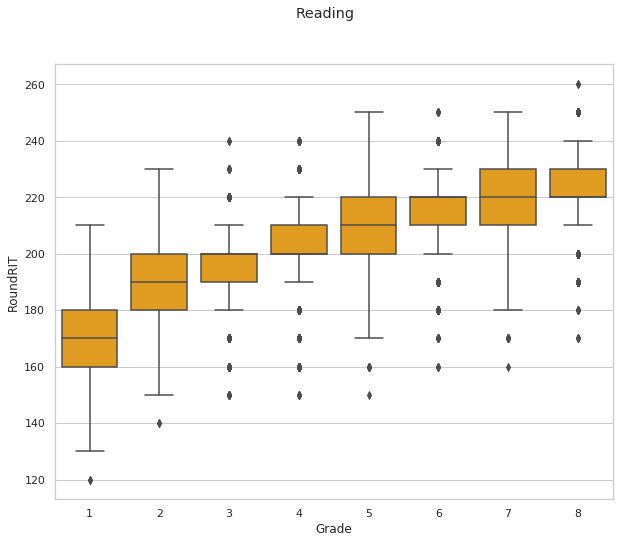

In [0]:
'''
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('Reading')
sns.boxplot( x=read['Grade'], y=read["RoundRIT"], color="orange")
#sns.plt.show()
'''

In [0]:
rv.tail()

,StudentID,Grade,Discipline,SpringtoSpringConditionalGrowthPercentile,TermName,SchoolName,TestPercentile,FalltoWinterConditionalGrowthIndex,WintertoWinterConditionalGrowthIndex,PercentCorrect,TestRITScore,RoundRIT,FtWCGI,WtWCGI
35853,50067284,1,Reading,50.0,Winter 2011-2012,Irving Park,75,0.45,1.15,60,181,180,"(0.29, 1.11]","(1.03, 13.54]"
35854,50078972,1,Reading,56.0,Winter 2011-2012,West Belden,65,0.24,0.71,50,176,180,"(-0.37, 0.29]","(0.29, 1.03]"
35855,50134906,1,Reading,61.0,Winter 2011-2012,Bucktown,60,1.20,0.00,55,175,180,"(1.11, 11.88]","(-0.32, 0.29]"
35856,50136564,1,Reading,71.0,Winter 2011-2012,Irving Park,95,0.59,-0.19,65,191,190,"(0.29, 1.11]","(-0.32, 0.29]"
35857,50167001,1,Reading,63.0,Winter 2011-2012,Irving Park,95,-1.26,0.64,65,193,190,"(-8.901, -1.12]","(0.29, 1.03]"


In [35]:
whole =pd.concat([rv, test2020], axis=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [36]:
test2020.shape

(4818, 13)

In [37]:
whole.shape

(33687, 14)

In [38]:
whole.head()

,Discipline,FalltoWinterConditionalGrowthIndex,FtWCGI,Grade,PercentCorrect,RoundRIT,SchoolName,SpringtoSpringConditionalGrowthPercentile,StudentID,TermName,TestPercentile,TestRITScore,WintertoWinterConditionalGrowthIndex,WtWCGI
6,Reading,0.20,"(-0.4, 0.3]",1,58,170,Irving Park,43.0,50227435,Winter 2012-2013,50,172,-0.07,"(-0.3, 0.3]"
7,Reading,0.37,"(0.3, 1.1]",1,52,170,Prairie,85.0,50137075,Winter 2012-2013,50,172,0.16,"(-0.3, 0.3]"
8,Reading,0.24,"(-0.4, 0.3]",1,58,160,Irving Park,67.0,50206255,Winter 2012-2013,15,158,-0.85,"(-1.1, -0.3]"
9,Reading,-0.07,"(-0.4, 0.3]",1,83,200,Bucktown,51.0,50233077,Winter 2012-2013,100,203,2.06,"(1.0, 13.5]"
12,Reading,1.66,"(1.1, 11.9]",1,59,170,Bucktown,38.0,50175685,Winter 2011-2012,55,173,0.30,"(0.3, 1.0]"


# Pre-processing

In [0]:
keep =['Grade', 'SchoolName', 'TestPercentile', 'WtWCGI', 'FtWCGI', 'RoundRIT']

In [0]:
read =whole[whole.Discipline=='Reading']
math =whole[whole.Discipline=='Mathematics']
rd =whole[whole.Discipline=='Reading']
md =whole[whole.Discipline=='Mathematics']

In [0]:
read = read[keep]
math = math[keep]

In [42]:
# CREATING DUMMIES
print ('The following columns have been broken into dummies:' , keep)
for dummy in keep:
    read = pp.dummy_variable(dummy, read)
    math = pp.dummy_variable(dummy, math)
print (' ')

The following columns have been broken into dummies: ['Grade', 'SchoolName', 'TestPercentile', 'WtWCGI', 'FtWCGI', 'RoundRIT']
 


In [43]:
math.shape

(16843, 64)

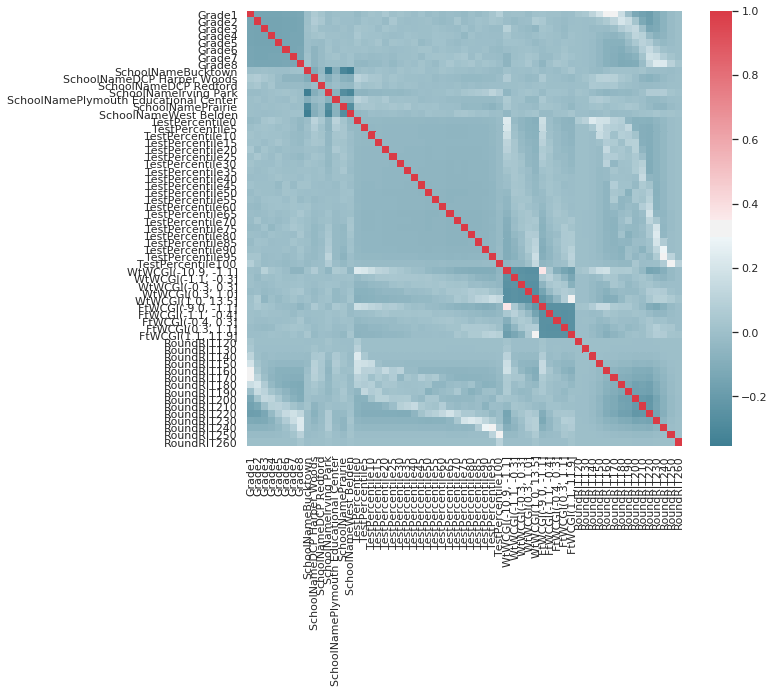

In [44]:
import numpy as np
pp.corr_matrix(read)

# Machine Learning

In [0]:
def plot_precision_recall_n(y_true, y_score, model_name):
    precision_curve, recall_curve, pr_thresholds = precision_recall_curve(y_true, y_score)
    precision_curve = precision_curve[:-1]
    recall_curve = recall_curve[:-1]
    pct_above_per_thresh = []
    number_scored = len(y_score)
    for value in pr_thresholds:
        num_above_thresh = len(y_score[y_score>=value])
        pct_above_thresh = num_above_thresh / float(number_scored)
        pct_above_per_thresh.append(pct_above_thresh)
    pct_above_per_thresh = np.array(pct_above_per_thresh)
    plt.clf()
    fig, ax1 = plt.subplots()
    ax1.plot(pct_above_per_thresh, precision_curve, 'b')
    ax1.set_xlabel('percent of population')
    ax1.set_ylabel('precision', color='b')
    ax2 = ax1.twinx()
    ax2.plot(pct_above_per_thresh, recall_curve, 'r')
    ax2.set_ylabel('recall', color='r')
    
    name = model_name
    plt.title(name)
    plt.savefig(name)
    plt.show()

For math

In [0]:
#Creating the binary y variable for machine learning
math['Y'] = np.where(md['SpringtoSpringConditionalGrowthPercentile']<= 40, 1, 0)

In [0]:
indepv = list(math.columns)
indepv.remove('Y')

In [48]:
md.TermName.unique()

array(['Winter 2012-2013', 'Winter 2011-2012', 'Winter 2013-2014',
       'Winter 2018-2019', 'Winter 2017-2018', 'Winter 2014-2015',
       'Winter 2015-2016', 'Winter 2016-2017', 'Winter 2019-2020'],
      dtype=object)

In [0]:
from sklearn.model_selection import train_test_split
x = math[indepv]
y = math['Y']  

In [0]:
x_train = x[(md.TermName=='Winter 2017-2018')|(md.TermName=='Winter 2016-2017')|(md.TermName=='Winter 2015-2014')]
y_train = y[(md.TermName=='Winter 2017-2018')|(md.TermName=='Winter 2016-2017')|(md.TermName=='Winter 2015-2014')]
x_val = x[md.TermName=='Winter 2018-2019']
y_val = y[md.TermName=='Winter 2018-2019']
x_test = x[md.TermName=='Winter 2019-2020']
y_test = y[md.TermName=='Winter 2019-2020']

In [74]:
x_test.shape

(2411, 64)

In [75]:
x_val.shape

(2284, 64)

In [76]:
x_train.shape

(3418, 64)

In [0]:
def slicedict(d, s):
    return {k:v for k,v in d.items() if k==s}

In [0]:
results = clf_loop(["RF",'Bag','Boost', 'ET', 'Tree'], x_train, x_val, y_train, y_val)

In [148]:
results.columns

Index(['model_type', 'parameters', 'auc-roc', 'precision', 'time',
       'precision,recall,f1 at_5', 'precision,recall,f1 at_10',
       'precision,recall,f1 at_20', 'precision,recall,f1 at_30',
       'precision,recall,f1 at_50'],
      dtype='object')

In [0]:
def best_grid(rdf, method = "auc-roc"):
    '''
    Iterate over the results and get the best parameters for each classifier
    and save the best_grid as a dictionary
    
    '''
    best = {}
    model = rdf.groupby("model_type")[method].nlargest(1)
    model = model.to_frame()
    model.reset_index(inplace = True)
    rows = list(model['level_1'])
    display(rdf.loc[rows].iloc[:,:])
    for row in rows:
        key = rdf.loc[row]["model_type"]
        v = rdf.loc[row]["parameters"]
        best[key] = v
    
    for k,arg in best.items():
        for key,val in arg.items():
            arg[key] = [val]

    return best

In [53]:
# Finding Base Probability of Not Grow in math
print ('Prob of Not Grow')
print (math['Y'].sum()/math.shape[0])

Prob of Not Grow
0.37404262898533513


In [0]:
#1 years train
#best = best_grid(results)

,model_type,parameters,accuracy,auc-roc,precision,time
26,Bag,"{'max_features': 10, 'max_samples': 5, 'n_esti...",0.434764,0.624578,0.519338,0.045454
34,Boost,"{'algorithm': 'SAMME', 'n_estimators': 100}",0.551226,0.653990,0.543718,0.341622
44,ET,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.533713,0.674306,0.576289,0.314862
5,RF,"{'max_depth': 5, 'max_features': 'log2', 'min_...",0.517075,0.666212,0.564894,0.220114
72,Tree,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.553853,0.615097,0.477309,0.005996


In [0]:
#2 years train
#best = best_grid(results)

,model_type,parameters,accuracy,auc-roc,precision,time
23,Bag,"{'max_features': 5, 'max_samples': 10, 'n_esti...",0.627846,0.630161,0.523748,0.108294
35,Boost,"{'algorithm': 'SAMME', 'n_estimators': 1000}",0.599825,0.647916,0.545886,4.681669
45,ET,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.629159,0.665780,0.568744,0.448778
1,RF,"{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.625657,0.665683,0.564958,0.283086
72,Tree,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.612522,0.620906,0.484832,0.005523


In [151]:
#3 years train
best = best_grid(results, 'auc-roc')

,model_type,parameters,auc-roc,precision,time,"precision,recall,f1 at_5","precision,recall,f1 at_10","precision,recall,f1 at_20","precision,recall,f1 at_30","precision,recall,f1 at_50"
22,Bag,"{'max_features': [[[5]]], 'max_samples': [[[10...",0.6065,0.5005,0.0430,"(0.6228, 0.0774, 0.1377)","(0.5965, 0.1483, 0.2376)","(0.5285, 0.2628, 0.3511)","(0.5343, 0.3991, 0.4569)","(0.4825, 0.6009, 0.5352)"
35,Boost,"{'algorithm': [[['SAMME']]], 'n_estimators': [...",0.6479,0.5459,4.2284,"(0.6579, 0.0818, 0.1455)","(0.6096, 0.1516, 0.2428)","(0.5811, 0.289, 0.386)","(0.5635, 0.4209, 0.4819)","(0.5044, 0.6281, 0.5595)"
47,ET,"{'criterion': [[['gini']]], 'max_depth': [[[5]...",0.6670,0.5701,0.4457,"(0.7456, 0.0927, 0.1649)","(0.6798, 0.169, 0.2707)","(0.6206, 0.3086, 0.4122)","(0.5825, 0.4351, 0.4981)","(0.5228, 0.651, 0.5799)"
5,RF,"{'max_depth': [[5]], 'max_features': [['log2']...",0.6628,0.5581,0.2429,"(0.6842, 0.0851, 0.1513)","(0.6798, 0.169, 0.2707)","(0.614, 0.3053, 0.4079)","(0.5796, 0.4329, 0.4956)","(0.5175, 0.6445, 0.5741)"
73,Tree,"{'criterion': [[['gini']]], 'max_depth': [[[5]...",0.6274,0.5010,0.0055,"(0.8509, 0.1058, 0.1882)","(0.7237, 0.1799, 0.2882)","(0.6447, 0.3206, 0.4283)","(0.5445, 0.4068, 0.4657)","(0.6278, 0.7819, 0.6965)"


In [0]:
def Predicting(x_train,  y_train, test, grid):
    models = []
    for row in grid:
        models.append(row)
        
    for index, clf in enumerate([clfs[x] for x in models]):
        model_params = grid[models[index]]
        for p in ParameterGrid(model_params):
                clf.set_params(**p)
    model = clf.fit(x_train, y_train)
    rv = clf.fit(x_train, y_train).predict_proba(test)[:,1]
                  
    return model, rv

In [0]:
#Select the best classifer for math
mclf = slicedict(best, 'RF')

In [0]:
mmodel, predy =Predicting(x_train, y_train, x_val, mclf)

<Figure size 432x288 with 0 Axes>

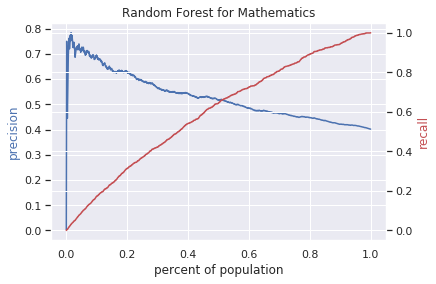

In [59]:
plot_precision_recall_n(y_val, predy,'Random Forest for Mathematics')

In [60]:
!pip3 install shap

Feature ranking for Y
1. Grade7 (0.095499)
2. FtWCGI(-9.0, -1.1] (0.092378)
3. WtWCGI(1.0, 13.5] (0.077038)
4. Grade2 (0.058930)
5. RoundRIT190 (0.045830)
6. Grade3 (0.044799)
7. RoundRIT230 (0.038792)
8. WtWCGI(-10.9, -1.1] (0.036463)
9. TestPercentile100 (0.029982)
10. RoundRIT240 (0.029017)
11. TestPercentile95 (0.027449)
12. SchoolNameIrving Park (0.025323)
13. FtWCGI(1.1, 11.9] (0.022568)
14. RoundRIT200 (0.020121)
15. TestPercentile15 (0.018084)
16. SchoolNameBucktown (0.017174)
17. Grade1 (0.016896)
18. RoundRIT170 (0.014895)
19. SchoolNameWest Belden (0.013862)
20. WtWCGI(0.3, 1.0] (0.013082)


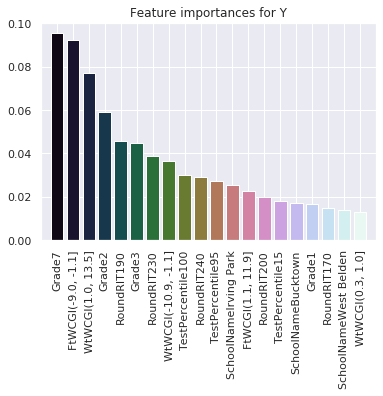

In [61]:
feature_importance(x_train, y_train, best, "RF", 20)

# For reading


In [0]:
#Creating the binary y variable for machine learning
read['Y'] = np.where(rd['SpringtoSpringConditionalGrowthPercentile']<= 40, 1, 0)

In [109]:
# Finding Base Probability of not grow in Reading
print ('Prob of not grow')
print (read['Y'].sum()/read.shape[0])

Prob of not grow
0.339289954880076


In [0]:
indepv = list(read.columns)
indepv.remove('Y')

In [0]:
xr = read[indepv]
yr = read['Y']  

In [0]:
x_trainr = xr[(rd.TermName=='Winter 2017-2018')|(rd.TermName=='Winter 2016-2017')|(rd.TermName=='Winter 2015-2016')]
y_trainr = yr[(rd.TermName=='Winter 2017-2018')|(rd.TermName=='Winter 2016-2017')|(rd.TermName=='Winter 2015-2016')]
x_vr = xr[rd.TermName=='Winter 2018-2019']
y_vr = yr[rd.TermName=='Winter 2018-2019']
x_testr = xr[rd.TermName=='Winter 2019-2020']
y_testr = yr[rd.TermName=='Winter 2019-2020']

In [0]:
resultr = clf_loop(["RF",'Bag','Boost', 'ET', 'KNN','Tree'], x_trainr, x_vr, y_trainr, y_vr)

In [153]:
bestr = best_grid(resultr)

,model_type,parameters,auc-roc,precision,time,"precision,recall,f1 at_5","precision,recall,f1 at_10","precision,recall,f1 at_20","precision,recall,f1 at_30","precision,recall,f1 at_50"
25,Bag,"{'max_features': [10], 'max_samples': [5], 'n_...",0.6494,0.5129,0.0249,"(0.693, 0.0922, 0.1627)","(0.6245, 0.1669, 0.2634)","(0.5839, 0.3127, 0.4073)","(0.5559, 0.4469, 0.4955)","(0.4874, 0.6534, 0.5583)"
35,Boost,"{'algorithm': ['SAMME'], 'n_estimators': [1000]}",0.6820,0.5751,5.2993,"(0.7193, 0.0957, 0.1689)","(0.7205, 0.1925, 0.3039)","(0.6427, 0.3442, 0.4483)","(0.5675, 0.4562, 0.5058)","(0.5004, 0.6709, 0.5733)"
61,ET,"{'criterion': ['entropy'], 'max_depth': [5], '...",0.6910,0.5796,0.4458,"(0.7544, 0.1004, 0.1771)","(0.7074, 0.189, 0.2983)","(0.6253, 0.3349, 0.4362)","(0.5835, 0.4691, 0.5201)","(0.4978, 0.6674, 0.5703)"
76,KNN,"{'algorithm': ['auto'], 'n_neighbors': [50], '...",0.6723,0.5554,2.9454,"(0.7544, 0.1004, 0.1771)","(0.7249, 0.1937, 0.3057)","(0.658, 0.3524, 0.459)","(0.582, 0.4679, 0.5188)","(0.4952, 0.6639, 0.5673)"
1,RF,"{'max_depth': [5], 'max_features': ['sqrt'], '...",0.6884,0.5699,0.3016,"(0.7281, 0.0968, 0.171)","(0.6769, 0.1809, 0.2855)","(0.634, 0.3396, 0.4422)","(0.5791, 0.4656, 0.5162)","(0.497, 0.6663, 0.5693)"
80,Tree,"{'criterion': ['gini'], 'max_depth': [5], 'max...",0.6580,0.5081,0.0058,"(0.7807, 0.1039, 0.1833)","(0.8734, 0.2334, 0.3683)","(0.6819, 0.3652, 0.4757)","(0.6647, 0.5344, 0.5925)","(0.6466, 0.867, 0.7408)"


In [0]:
rclf = slicedict(bestr, 'ET')

In [0]:
rmodel, predr =Predicting(x_trainr, y_trainr, x_vr, rclf)

<Figure size 432x288 with 0 Axes>

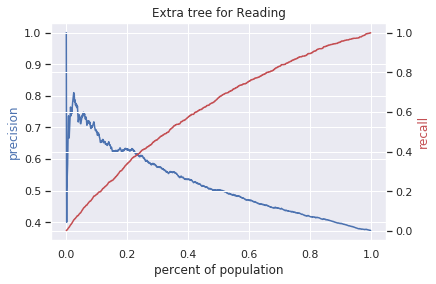

In [117]:
plot_precision_recall_n(y_vr, predr,'Extra tree for Reading')

Feature ranking for Y
1. WtWCGI(-10.9, -1.1] (0.126401)
2. Grade3 (0.111148)
3. WtWCGI(1.0, 13.5] (0.073820)
4. RoundRIT230 (0.070895)
5. RoundRIT160 (0.051957)
6. RoundRIT240 (0.051548)
7. Grade7 (0.050105)
8. SchoolNamePrairie (0.049839)
9. TestPercentile0 (0.035603)
10. TestPercentile85 (0.026682)
11. FtWCGI(-9.0, -1.1] (0.024430)
12. RoundRIT220 (0.023674)
13. TestPercentile5 (0.020318)
14. TestPercentile80 (0.019076)
15. SchoolNameBucktown (0.017435)
16. Grade4 (0.015903)
17. TestPercentile100 (0.013323)
18. WtWCGI(0.3, 1.0] (0.012178)
19. RoundRIT250 (0.012154)
20. Grade6 (0.011830)


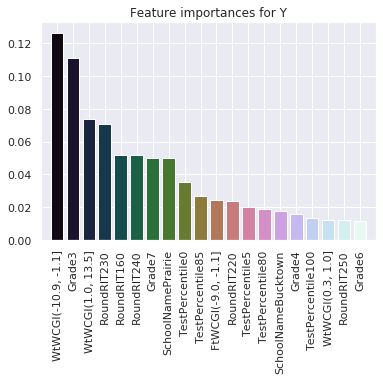

In [118]:
feature_importance(x_trainr, y_trainr, bestr, "ET", 20)

# Predicting 2019-2020 math

In [119]:
x_test.shape

(2411, 64)

In [0]:
xmath = x[(md.TermName=='Winter 2017-2018')|(md.TermName=='Winter 2016-2017')|(md.TermName=='Winter 2015-2016')|(md.TermName=='Winter 2018-2019')]
ymath = y[(md.TermName=='Winter 2017-2018')|(md.TermName=='Winter 2016-2017')|(md.TermName=='Winter 2015-2016')|(md.TermName=='Winter 2018-2019')]

In [121]:
xmath.shape

(7428, 64)

In [0]:
mmodel, pred2020 =Predicting(xmath, ymath, x_test, mclf)

In [0]:
math2020 = test2020[test2020.Discipline=='Mathematics']

In [124]:
math2020['math_pred']=pred2020


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [0]:
chischool= ['Prairie', 'Bucktown', 'Irving Park', 'West Belden']

In [0]:
math2020 =math2020[math2020.SchoolName.isin(chischool)]

In [0]:
math2020 =math2020.sort_values(by=['math_pred'], ascending=False)

In [128]:
math2020.shape[0]*0.4

702.0

In [0]:
features_to_see = [ 'SchoolName', 'Grade','TestPercentile','RoundRIT', 'FtWCGI', 'WtWCGI']

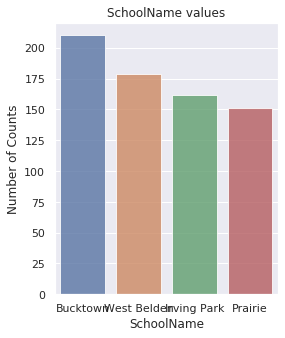

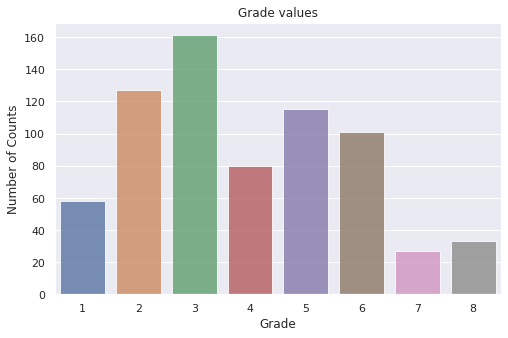

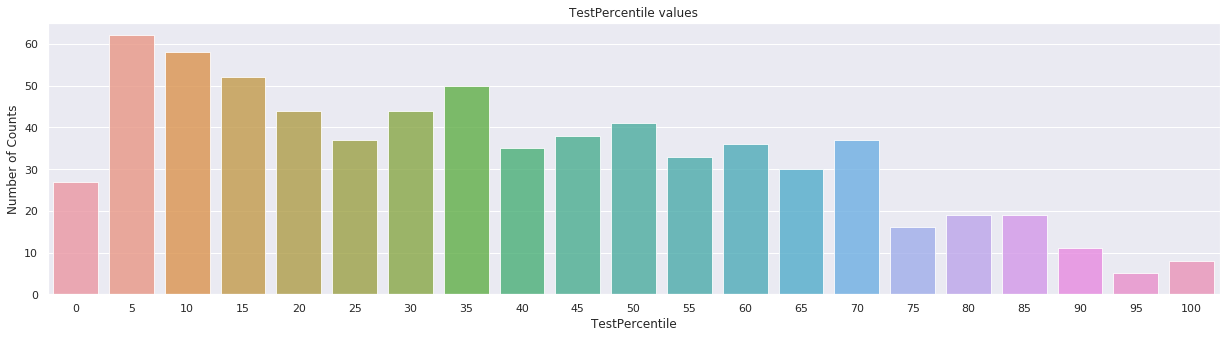

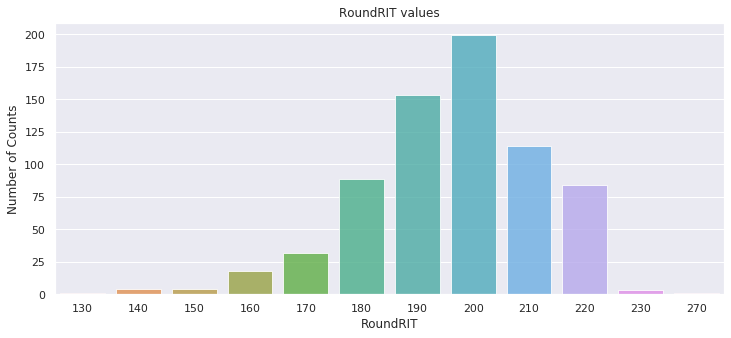

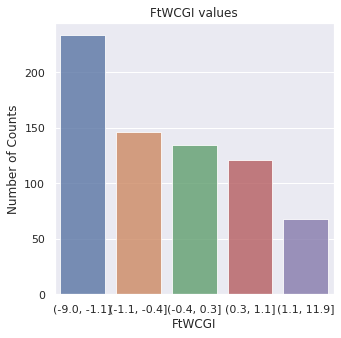

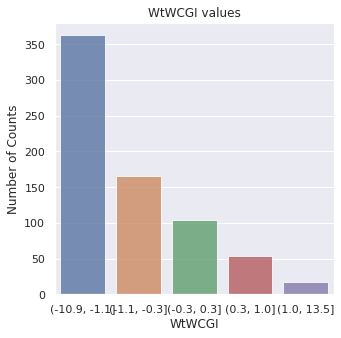

In [130]:
plot_df(math2020[:702], features_to_see, save=False)

# Predicting 2019-2020 Reading

In [0]:
xread = xr[(rd.TermName=='Winter 2017-2018')|(rd.TermName=='Winter 2016-2017')|(rd.TermName=='Winter 2015-2016')|(rd.TermName=='Winter 2018-2019')]
yread = yr[(rd.TermName=='Winter 2017-2018')|(rd.TermName=='Winter 2016-2017')|(rd.TermName=='Winter 2015-2016')|(rd.TermName=='Winter 2018-2019')]


In [132]:
x_testr.shape

(2407, 61)

In [0]:
rmodel, pred2020r =Predicting(xread, yread, x_testr, rclf)

In [0]:
read2020 = test2020[test2020.Discipline=='Reading']

In [135]:
read2020['read_pred']=pred2020r


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [136]:
read2020.head()

,TermName,StudentID,SchoolName,Grade,Discipline,TestPercentile,FalltoWinterConditionalGrowthIndex,WintertoWinterConditionalGrowthIndex,PercentCorrect,TestRITScore,RoundRIT,FtWCGI,WtWCGI,read_pred
778,Winter 2019-2020,2909817682,Plymouth Educational Center,7,Reading,80,0.62,0.10,50,229,230,"(0.3, 1.1]","(-0.3, 0.3]",0.299830
779,Winter 2019-2020,3496323659,Plymouth Educational Center,8,Reading,55,-0.23,-0.94,53,222,220,"(-0.4, 0.3]","(-1.1, -0.3]",0.356976
780,Winter 2019-2020,5642384769,Plymouth Educational Center,6,Reading,85,1.03,0.24,48,228,230,"(0.3, 1.1]","(-0.3, 0.3]",0.298901
781,Winter 2019-2020,7255399994,Plymouth Educational Center,7,Reading,85,0.70,0.34,50,234,230,"(0.3, 1.1]","(0.3, 1.0]",0.256027
782,Winter 2019-2020,8077775450,Plymouth Educational Center,8,Reading,75,0.19,-0.44,54,229,230,"(-0.4, 0.3]","(-1.1, -0.3]",0.343588


In [0]:
read2020 =read2020[read2020.SchoolName.isin(chischool)]

In [0]:
read2020 =read2020.sort_values(by=['read_pred'], ascending=False)

In [139]:
read2020.shape[0]*0.4

702.8000000000001

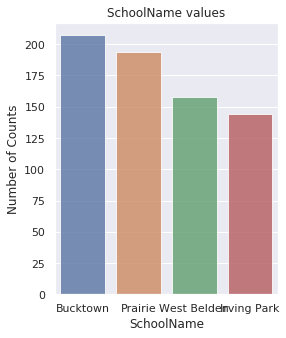

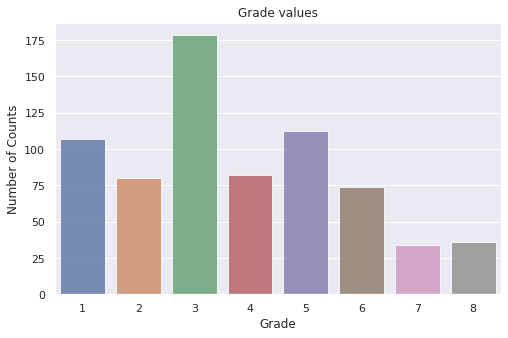

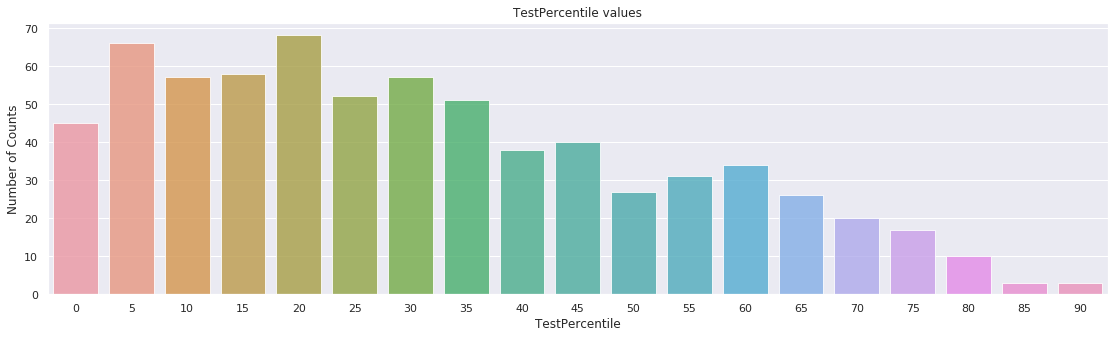

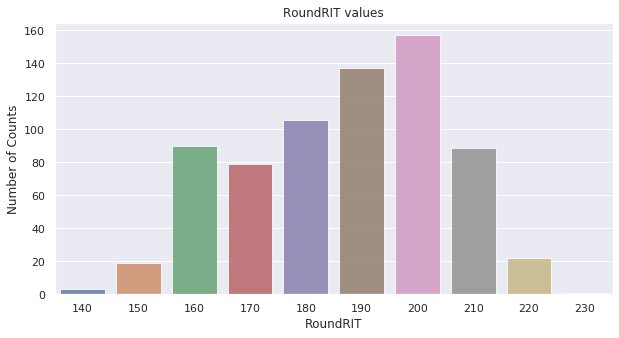

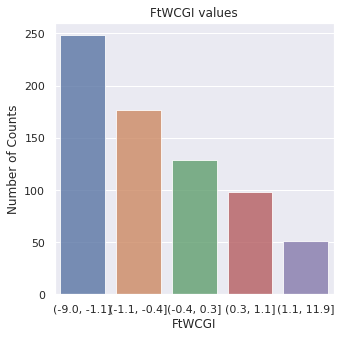

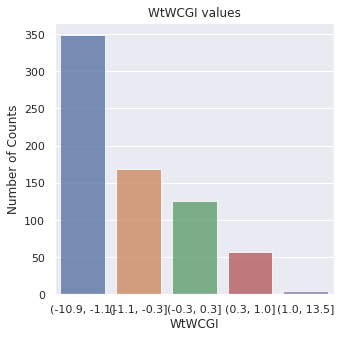

In [140]:
plot_df(read2020[:703], features_to_see, save=False)

In [0]:
math2020.to_csv('math_pred.csv', index=False)

In [0]:
read2020.to_csv('reading_pred.csv', index=False)

In [0]:
math[math.StudentID=='50237118']

,StudentID,Grade,Discipline,SpringtoSpringConditionalGrowthPercentile,TermName,SchoolName,TestPercentile,FalltoWinterConditionalGrowthIndex,WintertoWinterConditionalGrowthIndex,PercentCorrect,TestRITScore,RoundRIT,FtWCGI,WtWCGI
5964,50237118,4,Mathematics,1.0,Winter 2018-2019,Prairie,30,0.36,0.53,50,200,200,"(0.29, 1.11]","(0.29, 1.03]"
5965,50237118,4,Mathematics,1.0,Winter 2018-2019,Prairie,30,0.36,0.53,50,200,200,"(0.29, 1.11]","(0.29, 1.03]"


# Testing different threshold

In [0]:
predy

array([0.45534996, 0.55737705, 0.47120419, ..., 0.39622642, 0.45534996,
       0.45534996])

In [0]:
x_test.head()

,Grade1,Grade2,Grade3,Grade4,Grade5,Grade6,Grade7,Grade8,SchoolNameBucktown,SchoolNameDCP Harper Woods,SchoolNameDCP Redford,SchoolNameIrving Park,SchoolNamePlymouth Educational Center,SchoolNamePrairie,SchoolNameWest Belden,TestPercentile0,TestPercentile5,TestPercentile10,TestPercentile15,TestPercentile20,TestPercentile25,TestPercentile30,TestPercentile35,TestPercentile40,TestPercentile45,TestPercentile50,TestPercentile55,TestPercentile60,TestPercentile65,TestPercentile70,TestPercentile75,TestPercentile80,TestPercentile85,TestPercentile90,TestPercentile95,TestPercentile100,"WtWCGI(-10.770999999999999, -1.05]","WtWCGI(-1.05, -0.31]","WtWCGI(-0.31, 0.3]","WtWCGI(0.3, 1.04]","WtWCGI(1.04, 13.54]","FtWCGI(-8.901, -1.12]","FtWCGI(-1.12, -0.37]","FtWCGI(-0.37, 0.3]","FtWCGI(0.3, 1.12]","FtWCGI(1.12, 11.88]",PercentCorrect25,PercentCorrect30,PercentCorrect35,PercentCorrect40,PercentCorrect45,PercentCorrect50,PercentCorrect55,PercentCorrect60,PercentCorrect65,PercentCorrect70,PercentCorrect75,PercentCorrect80,PercentCorrect85,RoundRIT110,RoundRIT130,RoundRIT140,RoundRIT150,RoundRIT160,RoundRIT170,RoundRIT180,RoundRIT190,RoundRIT200,RoundRIT210,RoundRIT220,RoundRIT230,RoundRIT240,RoundRIT250,RoundRIT260,RoundRIT270,RoundRIT280
587,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
600,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
601,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
602,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
603,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


# Vizualize the tree

In [62]:
best

{'Bag': {'max_features': [5], 'max_samples': [10], 'n_estimators': [20]},
 'Boost': {'algorithm': ['SAMME'], 'n_estimators': [1000]},
 'ET': {'criterion': ['gini'],
  'max_depth': [5],
  'max_features': ['log2'],
  'min_samples_split': [10],
  'n_estimators': [100],
  'n_jobs': [-1]},
 'RF': {'max_depth': [5],
  'max_features': ['log2'],
  'min_samples_split': [2],
  'n_estimators': [100]},
 'Tree': {'criterion': ['gini'],
  'max_depth': [5],
  'max_features': ['sqrt'],
  'min_samples_split': [5]}}

In [0]:
clf = DecisionTreeClassifier(max_depth=5, criterion= 'gini', min_samples_split=5, max_features='sqrt')
clf = clf.fit(X=x_train, y=y_train)

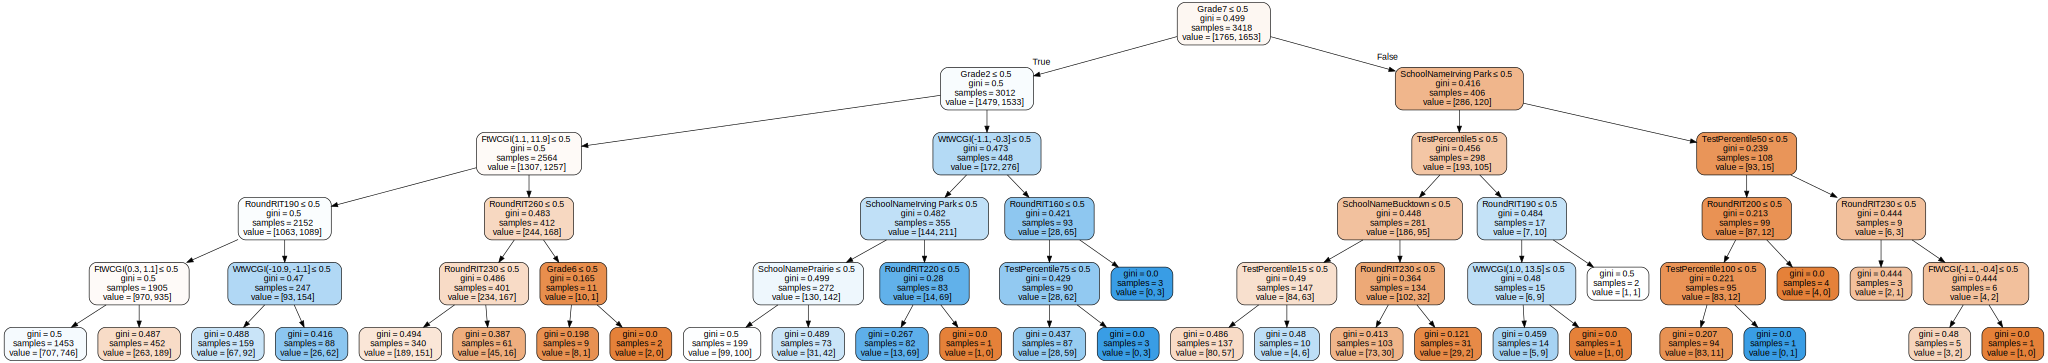

In [65]:
import graphviz 
from sklearn import tree
from graphviz import Source

# Visualization
features = list(x_train.columns)
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=features, 
                                filled=True, rounded=True, special_characters=True, )  
graph = graphviz.Source(dot_data)
graph

In [66]:
mmodel

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [67]:
import shap
# Need to load JS vis in the notebook
shap.initjs()

In [68]:
explainer = shap.TreeExplainer(mmodel)
shap_values = explainer.shap_values(x_train)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


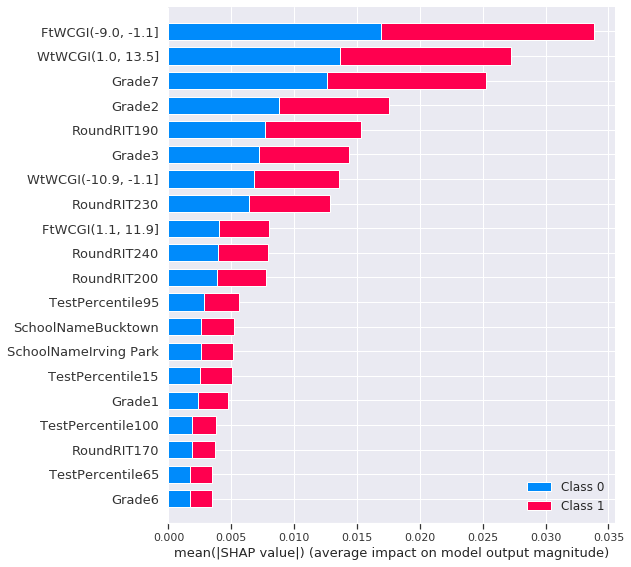

In [69]:
shap.summary_plot(shap_values, features=x, feature_names=x.columns)

In [70]:
predy

array([0.51373417, 0.5118026 , 0.60931678, ..., 0.4376893 , 0.29807988,
       0.43143746])

In [0]:
My =pd.DataFrame(predy, columns=['math_pred'])

In [0]:
My =My.sort_values(by=['math_pred'], ascending=False)

In [79]:
true_y.shape

(2284, 2)

In [0]:
My = pd.concat([My, true_y], axis=1)

In [90]:
My.head()

,math_pred,SpringtoSpringConditionalGrowthPercentile,Y
792,0.641640,95.0,0
1315,0.633239,1.0,1
163,0.633239,1.0,1
1237,0.633239,1.0,1
51,0.631735,1.0,1


In [91]:
My.shape[0]*0.4

913.6

In [0]:
math_at_risk_student = My[: 1400]

In [102]:
math_at_risk_student.tail()

,math_pred,SpringtoSpringConditionalGrowthPercentile,Y
1527,0.477889,99.0,0
2059,0.477629,60.0,0
1239,0.477555,49.0,0
2080,0.477530,11.0,1
1657,0.477332,99.0,0


In [103]:
print (math_at_risk_student['Y'].sum()/math_at_risk_student.shape[0])

0.47928571428571426


In [104]:
print (math_at_risk_student['Y'].sum()/My['Y'].sum())

0.7317339149400218


In [107]:
My.shape

(2284, 3)

# Cross validation

In [113]:
explainerr = shap.TreeExplainer(rmodel)
shap_values = explainerr.shap_values(x_trainr)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


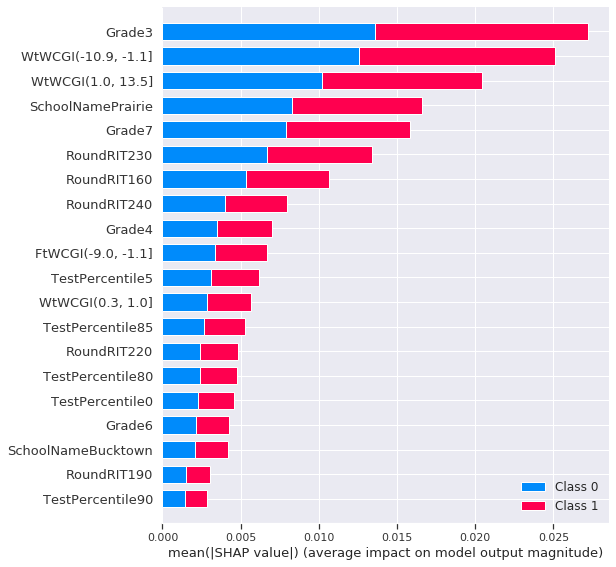

In [114]:
shap.summary_plot(shap_values, features=x_trainr, feature_names=x_trainr.columns)

In [0]:
mmodel, predy =Predicting(x_train, y_train, x_val, mclf)

In [0]:
My =pd.DataFrame(predy, columns=['math_pred'])

In [0]:
math2020 =math2020.sort_values(by=['math_pred'], ascending=False)

In [74]:
#Creating the binary y variable for machine learning
md['Y'] = np.where(md['SpringtoSpringConditionalGrowthPercentile']<= 40, 1, 0)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [0]:
true_y = md[md.TermName=='Winter 2018-2019']

In [0]:
true_y =true_y[['SpringtoSpringConditionalGrowthPercentile', 'Y']]

In [77]:
true_y.head()

,SpringtoSpringConditionalGrowthPercentile,Y
19875,81.0,0
19887,1.0,1
19894,2.0,1
19895,2.0,1
19896,5.0,1


In [143]:
#Potential baseline
md['SpringtoSpringConditionalGrowthPercentile'].median()

47.0

In [0]:
'''
#bins pred_y by 10% of the data
PBINS = [0,10,20,30,40,50,60,70,80,90,100]
LABELS = range(10)
#bin the waittime by 10 categories
true_y['Sbin']=pd.cut(true_y['SpringtoSpringConditionalGrowthPercentile'], bins=PBINS, labels = LABELS)

In [0]:
true_y=true_y.reset_index(drop=True)

In [0]:
true_y.head()

,SpringtoSpringConditionalGrowthPercentile,Y
0,1.0,1
1,1.0,1
2,8.0,1
3,8.0,1
4,65.0,0


In [0]:
My = pd.concat([My, true_y], axis=1)

In [85]:
My.head()

,math_pred,SpringtoSpringConditionalGrowthPercentile,Y,SpringtoSpringConditionalGrowthPercentile,Y
0,0.513734,NaN,NaN,81.0,0.0
1,0.511803,NaN,NaN,1.0,1.0
2,0.609317,NaN,NaN,2.0,1.0
3,0.609317,NaN,NaN,2.0,1.0
4,0.579534,NaN,NaN,5.0,1.0


In [0]:
#       Predict 0   1
# Actual
#   0          TN  FP
#   1          FN  TP

In [0]:
md['SpringtoSpringConditionalGrowthPercentile'].mean()/100

0.48298641906873613

In [149]:
#Potential baseline
base = md['SpringtoSpringConditionalGrowthPercentile'].median()/100
print('cutoff is ', base)
My['pred']= np.where(predy>= base, 1, 0)
print(confusion_matrix(My['Y'], My['pred'])) 
print('Accuracy Score :',accuracy_score(My['Y'], My['pred']) )
print('Report :' )
print(classification_report(My['Y'], My['pred']))
print ('The predicted number', My['pred'].sum())

cutoff is  0.47
[[602 765]
 [211 706]]
Accuracy Score : 0.5726795096322241
Report :
              precision    recall  f1-score   support

           0       0.74      0.44      0.55      1367
           1       0.48      0.77      0.59       917

    accuracy                           0.57      2284
   macro avg       0.61      0.61      0.57      2284
weighted avg       0.64      0.57      0.57      2284

The predicted number 1471


In [152]:
My['pred']= np.where(predy>= .4, 1, 0)
print(confusion_matrix(My['Y'], My['pred'])) 
print('Accuracy Score :',accuracy_score(My['Y'], My['pred']) )
print('Report :' )
print(classification_report(My['Y'], My['pred']))
print ('The predicted Not grow', My['pred'].sum())

[[ 133 1234]
 [  75  842]]
Accuracy Score : 0.4268826619964974
Report :
              precision    recall  f1-score   support

           0       0.64      0.10      0.17      1367
           1       0.41      0.92      0.56       917

    accuracy                           0.43      2284
   macro avg       0.52      0.51      0.37      2284
weighted avg       0.55      0.43      0.33      2284

The predicted Not grow 2076


In [168]:
My['pred']= np.where(predy>= .44, 1, 0)
print(confusion_matrix(My['Y'], My['pred'])) 
print('Accuracy Score :',accuracy_score(My['Y'], My['pred']) )
print('Report :' )
print(classification_report(My['Y'], My['pred']))
print ('The predicted ', My['pred'].sum())

[[387 980]
 [179 738]]
Accuracy Score : 0.4925569176882662
Report :
              precision    recall  f1-score   support

           0       0.68      0.28      0.40      1367
           1       0.43      0.80      0.56       917

    accuracy                           0.49      2284
   macro avg       0.56      0.54      0.48      2284
weighted avg       0.58      0.49      0.46      2284

The predicted  1718


In [169]:
My['pred']= np.where(predy>= .43, 1, 0)
print(confusion_matrix(My['Y'], My['pred'])) 
print('Accuracy Score :',accuracy_score(My['Y'], My['pred']) )
print('Report :' )
print(classification_report(My['Y'], My['pred']))
print ('The predicted ', My['pred'].sum())

[[ 334 1033]
 [ 150  767]]
Accuracy Score : 0.4820490367775832
Report :
              precision    recall  f1-score   support

           0       0.69      0.24      0.36      1367
           1       0.43      0.84      0.56       917

    accuracy                           0.48      2284
   macro avg       0.56      0.54      0.46      2284
weighted avg       0.58      0.48      0.44      2284

The predicted  1800


I am chosing .43 as the cutoff for maths, since we can get a recall of 91% and a f1-score of 59%. The predicted share of Not grow is .82

In [0]:
# Finding Base Probability of Not Grow in math
print ('Prob of Not grow')
print (math['Y'].sum()/math.shape[0])

Prob of Not grow
0.37513397642015006


# Reading

In [0]:
rmodel , pred_y =Predicting(x_trainr, y_trainr, x_testr, rclf)

In [0]:
import shap

In [0]:
explainerr = shap.TreeExplainer(rmodel)
shap_valuesr = explainerr.shap_values(x_trainr)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


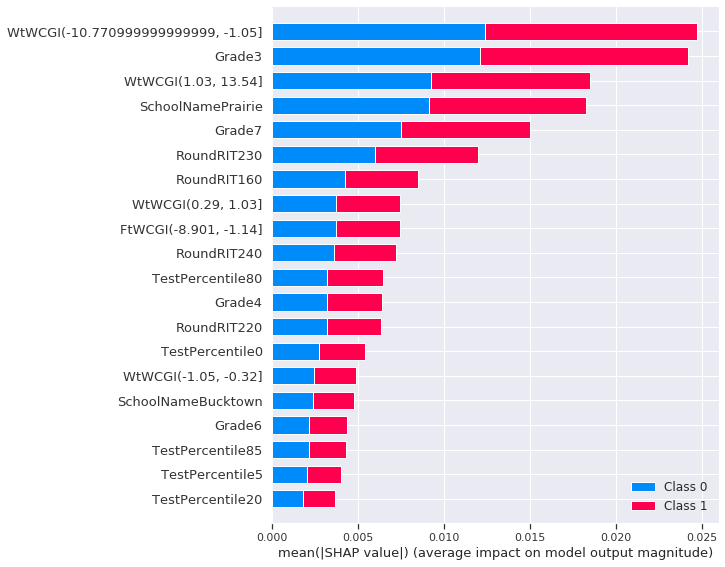

In [0]:
shap.summary_plot(shap_valuesr, features=x_trainr, feature_names=x_trainr.columns)

In [0]:
pred_y

array([0.38862821, 0.35512599, 0.50497648, ..., 0.29763813, 0.28747747,
       0.31614836])

In [0]:
py =pd.DataFrame(pred_y, columns=['pred'])

In [0]:
py.head()

,pred
0,0.388628
1,0.355126
2,0.504976
3,0.467381
4,0.395227


In [0]:
true_yr = rd[rd.TermName=='Winter 2018-2019']

In [0]:
true_yr.head()

,Discipline,FalltoWinterConditionalGrowthIndex,FtWCGI,Grade,PercentCorrect,RoundRIT,SchoolName,SpringtoSpringConditionalGrowthPercentile,StudentID,TermName,TestPercentile,TestRITScore,WintertoWinterConditionalGrowthIndex,WtWCGI,Sbin
20514,Reading,1.81,"(1.11, 11.88]",7,55,200,Prairie,5.0,45000419,Winter 2018-2019,20,203,-1.16,"(-10.770999999999999, -1.05]","(0, 20]"
20515,Reading,1.81,"(1.11, 11.88]",7,55,200,Prairie,5.0,45000419,Winter 2018-2019,20,203,-1.16,"(-10.770999999999999, -1.05]","(0, 20]"
20518,Reading,0.09,"(-0.38, 0.28]",6,50,200,Prairie,27.0,45483428,Winter 2018-2019,20,200,0.12,"(-0.32, 0.29]","(20, 40]"
20519,Reading,0.09,"(-0.38, 0.28]",6,50,200,Prairie,27.0,45483428,Winter 2018-2019,20,200,0.12,"(-0.32, 0.29]","(20, 40]"
20522,Reading,-1.98,"(-8.901, -1.14]",8,50,220,Prairie,18.0,50025527,Winter 2018-2019,60,223,-1.76,"(-10.770999999999999, -1.05]","(0, 20]"


In [0]:
#bins pred_y by 10% of the data

BINS = [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
#bin the waittime by 10 categories
true_yr['Sbin']=pd.cut(true_yr['SpringtoSpringConditionalGrowthPercentile'], bins=PBINS)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [0]:
true_yr =true_yr[['SpringtoSpringConditionalGrowthPercentile', 'Sbin']]

In [0]:
true_yr=true_yr.reset_index(drop=True)

In [0]:
true_yr.head()

,SpringtoSpringConditionalGrowthPercentile,Sbin
0,5.0,"(0, 20]"
1,5.0,"(0, 20]"
2,27.0,"(20, 40]"
3,27.0,"(20, 40]"
4,18.0,"(0, 20]"


In [0]:
py = pd.concat([py, true_yr], axis=1)

In [0]:
#Creating the binary y variable for machine learning
py['Y'] = np.where(py['SpringtoSpringConditionalGrowthPercentile']<= 40, 1, 0)

In [0]:
pred_y

array([0.38862821, 0.35512599, 0.50497648, ..., 0.29763813, 0.28747747,
       0.31614836])

In [0]:
py.head()

,pred,SpringtoSpringConditionalGrowthPercentile,Sbin,Y
0,0,5.0,"(0, 20]",1
1,0,5.0,"(0, 20]",1
2,1,27.0,"(20, 40]",1
3,1,27.0,"(20, 40]",1
4,0,18.0,"(0, 20]",1


In [0]:
pred_y.min()

0.23339883940209635

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [0]:
#Optimize for recall
tn, fp, fn, tp = confusion_matrix(py['Y'], py['pred']).ravel()
print('Recall :', tp/(fn+tp))
print('Precision :', tp/(fp+tp))

Recall : 0.5495915985997666
Precision : 0.521594684385382


In [0]:
py['pred']= np.where(pred_y>= .4, 1, 0)
print(confusion_matrix(py['Y'], py['pred'])) 
print('Accuracy Score :',accuracy_score(py['Y'], py['pred']) )
print('Report :' )
print(classification_report(py['Y'], py['pred']))
print ('The predicted share of Not grow', py['pred'].sum()/py.shape[0])

[[855 642]
 [448 409]]
Accuracy Score : 0.5369583687340697
Report :
              precision    recall  f1-score   support

           0       0.66      0.57      0.61      1497
           1       0.39      0.48      0.43       857

    accuracy                           0.54      2354
   macro avg       0.52      0.52      0.52      2354
weighted avg       0.56      0.54      0.54      2354

The predicted share of Not grow 0.4464740866610025


I am chosing .3 as the cutoff for maths, since we can get a recall of 97% and a f1-score of 53%. The predicted share of Not grow is .82

In [0]:
py['pred']= np.where(pred_y>= .35, 1, 0)
print(confusion_matrix(py['Y'], py['pred'])) 
print('Accuracy Score :', accuracy_score(py['Y'], py['pred']) )
print('Report :' )
print(classification_report(py['Y'], py['pred']))
print ('The predicted share of Not grow', py['pred'].sum()/py.shape[0])

[[ 316 1181]
 [ 153  704]]
Accuracy Score : 0.4333050127442651
Report :
              precision    recall  f1-score   support

           0       0.67      0.21      0.32      1497
           1       0.37      0.82      0.51       857

    accuracy                           0.43      2354
   macro avg       0.52      0.52      0.42      2354
weighted avg       0.56      0.43      0.39      2354

The predicted share of Not grow 0.8007646559048428


In [0]:
py['pred']= np.where(pred_y>= .38, 1, 0)
print(confusion_matrix(py['Y'], py['pred'])) 
print('Accuracy Score :', accuracy_score(py['Y'], py['pred']) )
print('Report :' )
print(classification_report(py['Y'], py['pred']))
print ('The predicted share of Not grow', py['pred'].sum()/py.shape[0])

[[599 898]
 [302 555]]
Accuracy Score : 0.49022939677145283
Report :
              precision    recall  f1-score   support

           0       0.66      0.40      0.50      1497
           1       0.38      0.65      0.48       857

    accuracy                           0.49      2354
   macro avg       0.52      0.52      0.49      2354
weighted avg       0.56      0.49      0.49      2354

The predicted share of Not grow 0.6172472387425658


In [0]:
py['pred']= np.where(pred_y>= .28, 1, 0)
print(confusion_matrix(py['Y'], py['pred'])) 
print('Accuracy Score :',accuracy_score(py['Y'], py['pred']) )
print('Report :' )
print(classification_report(py['Y'], py['pred']))
print ('The predicted share of Not grow', py['pred'].sum()/py.shape[0])

[[  29 1468]
 [  13  844]]
Accuracy Score : 0.37085811384876805
Report :
              precision    recall  f1-score   support

           0       0.69      0.02      0.04      1497
           1       0.37      0.98      0.53       857

    accuracy                           0.37      2354
   macro avg       0.53      0.50      0.29      2354
weighted avg       0.57      0.37      0.22      2354

The predicted share of Not grow 0.9821580288870009


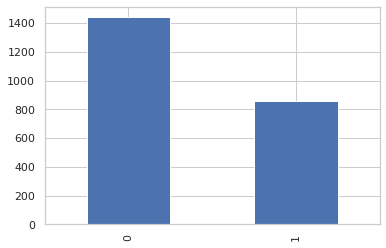

In [0]:
py['Y'].value_counts().plot.bar()

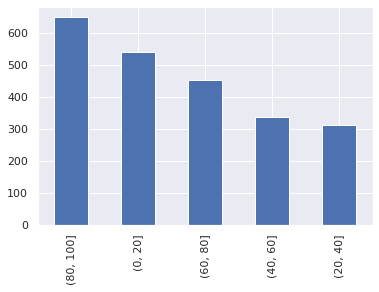

In [0]:
py['Sbin'].value_counts().plot.bar()

#Previous code

In [0]:
def logit(x_train, x_test, y_train, y_test):
    '''
    Run logit regression and print out the scores for comparison
    '''

    # get train/test data
     
    log = linear_model.LogisticRegression()
    log_model = log.fit(x_train, y_train)
    predictions = log_model.predict(x_test)

    # plot
    plt.scatter(y_test, predictions)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.axis()
    plt.show()

    print('Logit Score test + train:', log_model.score(x_test, y_test), log_model.score(x_train, y_train))

In [0]:
def feature_importance(x_train, y_train, clf, k=10):
    '''
    Based on the best grid for each classifer, print out the 
    top k important features
    '''

    indepv = list(x_train.columns)
    importances = clf.feature_importances_
    current_palette = sns.color_palette(sns.color_palette("cubehelix", k))
    
    indices = np.argsort(importances)[::-1]
    indices = indices[:k]

    # Print the feature ranking
    print("Feature ranking for %s" % (y_train.name))

    labels_arr = []
    for f in range(len(indices)):
        label = indepv[indices[f]]
        labels_arr.append(label)
        print("%d. %s (%f)" % (f+1, label, importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances for %s" % (y_train.name))
    plt.bar(range(len(indices)), importances[indices], align="center", tick_label = labels_arr, color= current_palette)
    plt.xlim([-1, len(indices)])
    plt.xticks(range(len(indices)),labels_arr, rotation = 'vertical')
    plt.show()
    return

In [0]:
def rf(x_train, x_test, y_train, y_test):
    '''
    Generate the random forest model using existing dataset
    Returns: (None)
       Save the random forest model using pickle
    
    '''
    rf_model = RandomForestClassifier(max_depth=5, max_features='log2', min_samples_split=10, n_estimators=10)
    rf_model.fit(x_train, y_train)
    predictions =  rf_model.predict(x_test)
    # plot
    plt.scatter(y_test, predictions)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.axis()
    plt.show()
    print(rf_model)
    print('RandomForest Score:',  rf_model.score(x_test, y_test),  rf_model.score(x_train, y_train))
    return rf_model


In [0]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.neighbors.kde import KernelDensity
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.kde module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
def ols(x_train, x_test, y_train, y_test):
    '''
    Run ols regression and print out the scores for comparison
    '''
    # fit a OLS model
    ols = linear_model.LinearRegression()
    ols_model = ols.fit(x_train, y_train)
    predictions = ols.predict(x_test)

    # plot
    plt.scatter(y_test, predictions)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.axis()
    plt.show()

    print('OLS Score:', ols_model.score(x_test, y_test), ols_model.score(x_train, y_train))
    #return predictions, x_test, y_test